# Generalisation vs. efficiency dilemma on the example of the binary classification problem. 
---

## Section 1: Introduction:

This document compares two deep learning models that aim to recognise the sentiment (i.e. positivity or negativity) of a movie review. The first one is the model presented on the lectures introducing the Binary classification problem (Jupyter Notebook 3.4:classifying-movie-reviews-a-binary-classification-example) and the second one is an enhanced version using regularisers, the drop-out layers and different hyper-parameters added incrementally after running a series of training sessions and plotting their results.   

---
### _Main objective_: discover if, when and why the second model is better than the first one. 
---

My comparison is conducted on the IMDB dataset described in the "Deep Learning With Python" book (Chollet F., Manning Publications)[1] that is available directly in the Keras API.

### 1.1 Document structure 

The document is structured into 3 sections. Section 1 is an introduction. Section 2 provides the reader with the results of training both the base and the enhanced model found respectively in parts 2.1 and 2.2. Additionally, whenever there is any new concept that was not described in this document, there will be an explanation of it prior to running the adequate code.   
Section 3 gives a conclusion to the experiment along with some extra remarks that didn't fit find space in section 2. 

---

## Section 2: IMDB Dataset deep learning models. Methods and results.

### 2.1: Overview and base implementation 

##### 2.1.1: IMDB Dataset description

IMDB Dataset is a collection of reviews from the Internet Movie Database. It consists of 50,000 movie reviews that are split into 2 sets 25,000 reviews each, one for training and one for testing purposes. Each review has its label (often called a "sentiment"). If the review is positive it has a label "1", otherwise "0". Being given 25,000 reviews, our model will try to learn associations between used words in the reviews and the sentiment this particular review has. In simpler terms, given a large number of reviews with a label of "1" (i.e. positive) such as e.g. "I like this movie", "It is extraordinary" etc. our model will learn that this particular word likely means the review is positive - accordingly it will learn to "feel" what is a negative review. 

##### 2.1.2. Loading the dataset 

IMDB movie reviews dataset is one of the datasets that comes within Keras' API. It has been preprocessed for a data scientist's convenience and therefore saves a number of steps otherwise necessary during the pre-processing stage of the dataset. The list of those is following: [2]

- Instead of just a sequence of strings, each review was encoded into a sequence of word indices. Moreover, they are encoded in such a way the most frequent words are the ones with the lowest index. 
- Upon importing the imdb dataset from keras and calling imdb.load_data in python code, will return to us 2 tuples, first with a pair of the training reviews and test reviews and the second with a pair of associated training labels and test labels (see the cell below).
- 8 optional arguments during the imdb.load_data() call which allow us e.g. to limit our encoded words to X number of the most frequent words ("num_words" argument) so that any less frequent word will be encoded as "unknown word" (by default the index for an unknown word is "2" and it can be changed with another optional argument "oov_char") or ignore a desired number of the most frequent words ("skip_top" argument) - this will also encode those top words with the index of the unknown word.   

Let us load the dataset in code:

In [1]:
from keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


###### 2.1.3: Pre-processing stage

One of the harder parts of creating a real-life deep learning model is to convert the data into a format the model can properly make calculations on and successively alter the data of. In order for the model to do that the data needs to be fed to the model in the shape of vectorised tensors. The imdb dataset we acquire from keras already comes mostly pre-processed and the only task of ours is to vectorise the given data.    

For that we will use a piece of code provided on the lecture: 

In [2]:
import numpy as np

def vectorise_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)


Following this "DRY" convention , we might want to modify the lecture code and also create "vectorise_labels" function, we might not save a lot of code lines, but we will at least we increased the code readability by properly naming the function. Because the labels already come as a tuple conformed of 0-1 integers, we just simply need to return them as a float32-encoded array (or "list" in python's terms).   

In [3]:
def vectorise_labels (raw_labels):
    return np.asarray(raw_labels).astype('float32')

y_train = vectorise_labels(train_labels) 
y_test =  vectorise_labels(test_labels)

###### 2.1.4: Composing the model and the validation set

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

We will use a hold-out validation approach. This approach will be later evaluated on terms of whether it will or will not make  an information leak.  

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

###### 2.1.5: Training the model 

In [7]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 401us/step - loss: 0.5055 - acc: 0.7863 - val_loss: 0.3782 - val_acc: 0.8702
Epoch 2/20
15000/15000 [==============================] - 4s 262us/step - loss: 0.2994 - acc: 0.9049 - val_loss: 0.3002 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.2174 - acc: 0.9288 - val_loss: 0.3086 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.1748 - acc: 0.9438 - val_loss: 0.2831 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1422 - acc: 0.9543 - val_loss: 0.2856 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.1149 - acc: 0.9653 - val_loss: 0.3128 - val_acc: 0.8787
Epoch 7/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.0977 - acc: 0.9711 - val_loss: 0.3133 - 

###### 2.1.6: Plotting and the evaluation of the training results

As we will be plotting our accuracy and loss results many time over this experiment, let us enhance the original code provided on the lectures and create a more "DRY" approach of the plotting procedure by creating a function definition "plotFunc" : 

In [8]:
import matplotlib.pyplot as plt
def plotFunc(isLossPlot, epochsNum, train_LossOrAcc, val_LossOrAcc):
    """Plots either a train & val loss (when isLossPlot is True) or the accuracy"""
    plt.clf() #Clear any previous plot
    if isLossPlot: 
        label1 = 'Training loss'
        label2 = 'Validation loss'
    else: 
        label1 = 'Training accuracy'
        label2 = 'Validation accuracy'
    plt.plot(epochsNum, train_LossOrAcc, 'bo', label =label1)
    plt.plot(epochsNum, val_LossOrAcc, 'b', label = label2)  
    plt.xlabel('Epochs')
    # We repeat the condition to correctly name the ylabel. 
    # NB. We could avoid repeating the conditional by just extracting/slicing the second word from the label 1 or 2 
    # but for an increased readability I left it this way. 
    if isLossPlot:
        plt.title("Training and validation loss")
        plt.ylabel('Loss')
    else: 
        plt.title("Training and validation accuracy")
        plt.ylabel('Accuracy')
    plt.legend()



Our next step is outputting the results of the loss and accuracy results of our model on both the training and validation sets as a plot. For that we will firstly obtain necessary data from our model's memory that can by found in a Python dictionary's format by calling: "our_model_variable_name.history". We will use our newly created plotFunc function to handle the plotting action.

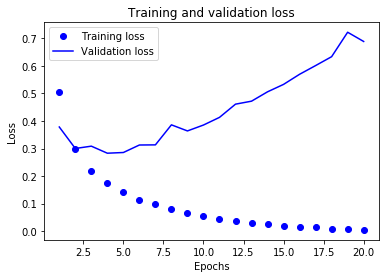

In [9]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

Similarly we will now plot the accuracy results:

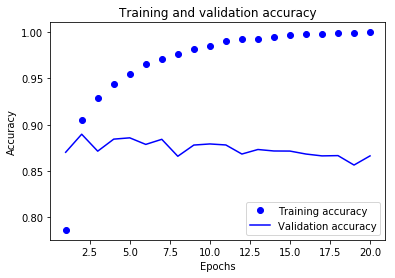

In [10]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

### 2.2: Enhancing the model

##### 2.2.1: Adding a regulariser 

Using both L1 and L2 regularisers

In [11]:
from keras import regularizers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
ourModel = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 282us/step - loss: 1.0964 - acc: 0.7569 - val_loss: 0.7484 - val_acc: 0.8266
Epoch 2/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.6994 - acc: 0.8285 - val_loss: 0.6686 - val_acc: 0.8487
Epoch 3/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.6348 - acc: 0.8533 - val_loss: 0.6566 - val_acc: 0.8226
Epoch 4/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.6009 - acc: 0.8545 - val_loss: 0.6011 - val_acc: 0.8563
Epoch 5/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.5743 - acc: 0.8659 - val_loss: 0.5802 - val_acc: 0.8633
Epoch 6/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.5635 - acc: 0.8645 - val_loss: 0.5719 - val_acc: 0.8660
Epoch 7/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.5518 - acc: 0.8681 - val_loss: 0.5607 - 

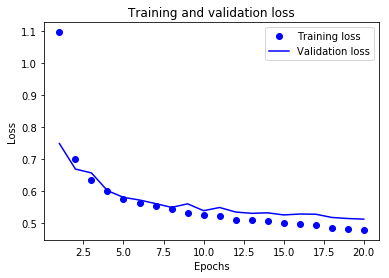

In [14]:
history_dict = ourModel.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

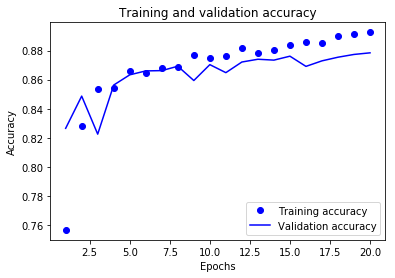

In [15]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

Using the L2 regulariser only

In [16]:
from keras import regularizers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu',  kernel_regularizer=regularizers.l2(0.001), input_shape = (10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [19]:
ourModel = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.5615 - acc: 0.7843 - val_loss: 0.4348 - val_acc: 0.8676
Epoch 2/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.3661 - acc: 0.8933 - val_loss: 0.3663 - val_acc: 0.8792
Epoch 3/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.2928 - acc: 0.9191 - val_loss: 0.3323 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.2556 - acc: 0.9309 - val_loss: 0.3425 - val_acc: 0.8802
Epoch 5/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.2320 - acc: 0.9398 - val_loss: 0.3314 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.2126 - acc: 0.9485 - val_loss: 0.3380 - val_acc: 0.8852
Epoch 7/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.2059 - acc: 0.9482 - val_loss: 0.3419 - 

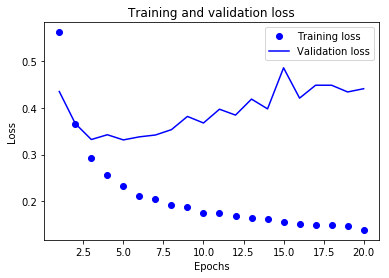

In [20]:
history_dict = ourModel.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

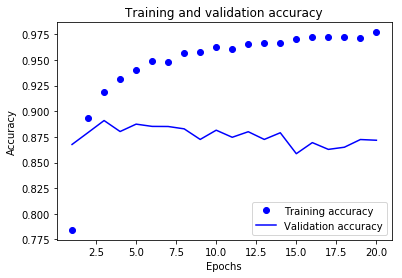

In [21]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

Regulariser choice verdict: **L1_L2**. 


Reasoning: as shown on the plots above, using both L1 and L2 regularisers gives a promise of better results and much later occurring over-fitting   

##### 2.2.2. Adding a dropout 

In [22]:
from keras import regularizers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [23]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
ourModel = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 259us/step - loss: 1.1881 - acc: 0.6158 - val_loss: 0.8311 - val_acc: 0.7355
Epoch 2/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.7822 - acc: 0.7185 - val_loss: 0.7329 - val_acc: 0.8446
Epoch 3/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.7366 - acc: 0.7670 - val_loss: 0.6737 - val_acc: 0.8519
Epoch 4/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.7075 - acc: 0.7878 - val_loss: 0.6525 - val_acc: 0.8473
Epoch 5/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.6868 - acc: 0.8067 - val_loss: 0.6091 - val_acc: 0.8583
Epoch 6/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.6729 - acc: 0.8128 - val_loss: 0.5894 - val_acc: 0.8606
Epoch 7/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.6523 - acc: 0.8287 - val_loss: 0.5861 - 

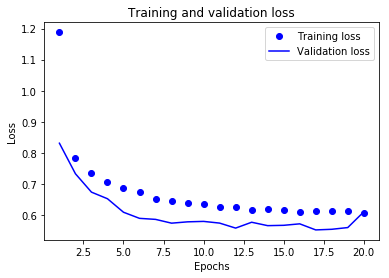

In [24]:
history_dict = ourModel.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

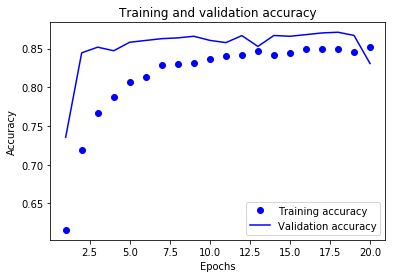

In [25]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

##### 2.2.3: Adjusting the hyper-parameters 

##### Smaller network's size

In [26]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [27]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
ourModel = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.8088 - acc: 0.5473 - val_loss: 0.7136 - val_acc: 0.6370
Epoch 2/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.7093 - acc: 0.5813 - val_loss: 0.6929 - val_acc: 0.7891
Epoch 3/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.7006 - acc: 0.5986 - val_loss: 0.6784 - val_acc: 0.7142
Epoch 4/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.6966 - acc: 0.6003 - val_loss: 0.6695 - val_acc: 0.7718
Epoch 5/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.6916 - acc: 0.6103 - val_loss: 0.6739 - val_acc: 0.8420
Epoch 6/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.6888 - acc: 0.6163 - val_loss: 0.6682 - val_acc: 0.8460
Epoch 7/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.6875 - acc: 0.6177 - val_loss: 0.6545 - 

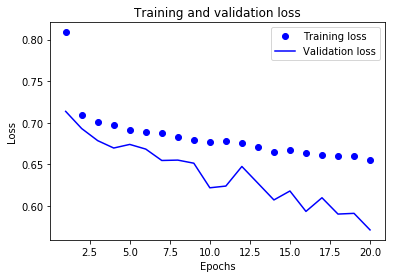

In [28]:
history_dict = ourModel.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

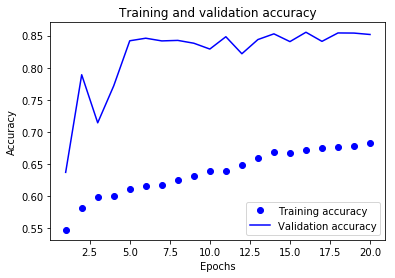

In [29]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

##### Increased Learning Rate

In [30]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [31]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.002),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.7926 - acc: 0.5049 - val_loss: 0.7640 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.7434 - acc: 0.5451 - val_loss: 0.7163 - val_acc: 0.8119
Epoch 3/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.7208 - acc: 0.5931 - val_loss: 0.6922 - val_acc: 0.7248
Epoch 4/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.7055 - acc: 0.6060 - val_loss: 0.6548 - val_acc: 0.8386
Epoch 5/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.6975 - acc: 0.6513 - val_loss: 0.6482 - val_acc: 0.8285
Epoch 6/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.6892 - acc: 0.6715 - val_loss: 0.6801 - val_acc: 0.7351
Epoch 7/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.6856 - acc: 0.6751 - val_loss: 0.6098 - 

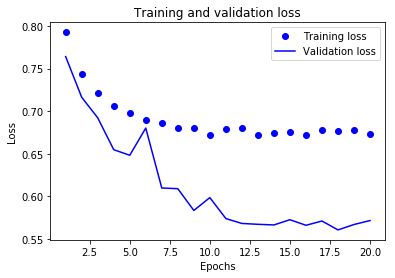

In [32]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

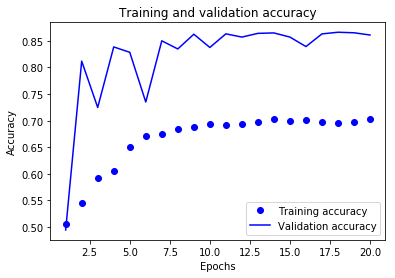

In [33]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

Verdict: an increased learning rate causes a bigger spread of the results. As our model seemed not to over-fit over the epochs when the learning rate was smaller I believe there is no need to increase the learning rate.

##### Various Batch Sizes 

Batch size 256

In [34]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [35]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 256,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 333us/step - loss: 0.7734 - acc: 0.5837 - val_loss: 0.7125 - val_acc: 0.7767
Epoch 2/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.6942 - acc: 0.6655 - val_loss: 0.6512 - val_acc: 0.8369
Epoch 3/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.6707 - acc: 0.7002 - val_loss: 0.6152 - val_acc: 0.8500
Epoch 4/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.6505 - acc: 0.7168 - val_loss: 0.5846 - val_acc: 0.8311
Epoch 5/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.6390 - acc: 0.7199 - val_loss: 0.5683 - val_acc: 0.8594
Epoch 6/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.6353 - acc: 0.7266 - val_loss: 0.5524 - val_acc: 0.8564
Epoch 7/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.6293 - acc: 0.7344 - val_loss: 0.5361 - 

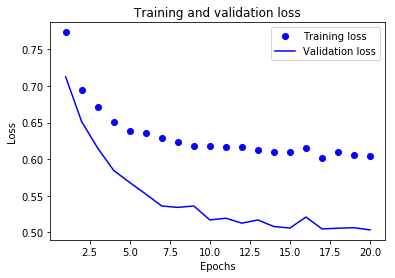

In [36]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

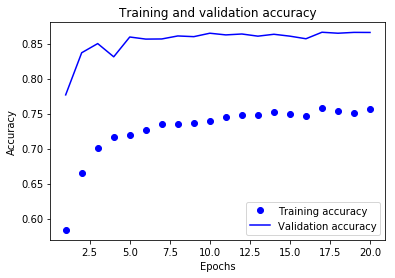

In [37]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

Batch size 1024

In [38]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [39]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 1024,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.9180 - acc: 0.5343 - val_loss: 0.7503 - val_acc: 0.7709
Epoch 2/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.7247 - acc: 0.5912 - val_loss: 0.6780 - val_acc: 0.8249
Epoch 3/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.6907 - acc: 0.6039 - val_loss: 0.6529 - val_acc: 0.8455
Epoch 4/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.6785 - acc: 0.6138 - val_loss: 0.6369 - val_acc: 0.8321
Epoch 5/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.6697 - acc: 0.6169 - val_loss: 0.6157 - val_acc: 0.8543
Epoch 6/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.6643 - acc: 0.6237 - val_loss: 0.6006 - val_acc: 0.8563
Epoch 7/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.6528 - acc: 0.6362 - val_loss: 0.5887 - 

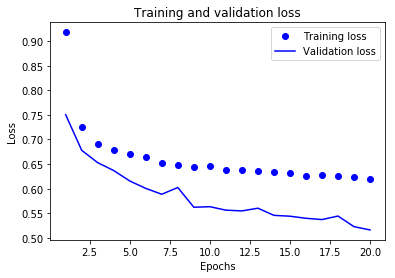

In [40]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

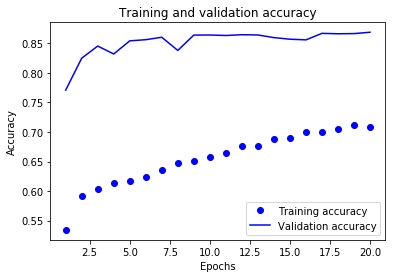

In [41]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

Verdict: changing the batch sizes seems to make a marginal difference, therefore I will arbitrarily choose batch size of 256 as it is potentially more data to process (once more, the model seems not to over-fit thus more data to process might give us better generalisation, instead of the contrary if the over-fitting was occurring).

##### Different amount of epochs

Due to the very good results in tackling the overfitting by using the regularisers and a dropout, we might want to increase the number of epochs on our models. Let us see the results of that.

More epochs:

In [42]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [43]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 35,
                    batch_size = 256,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/35
15000/15000 [==============================] - 4s 284us/step - loss: 0.7791 - acc: 0.5209 - val_loss: 0.7004 - val_acc: 0.8050
Epoch 2/35
15000/15000 [==============================] - 3s 232us/step - loss: 0.7088 - acc: 0.5487 - val_loss: 0.6781 - val_acc: 0.8318
Epoch 3/35
15000/15000 [==============================] - 3s 207us/step - loss: 0.6896 - acc: 0.5803 - val_loss: 0.6649 - val_acc: 0.8451
Epoch 4/35
15000/15000 [==============================] - 4s 272us/step - loss: 0.6810 - acc: 0.6073 - val_loss: 0.6456 - val_acc: 0.8331
Epoch 5/35
15000/15000 [==============================] - 3s 223us/step - loss: 0.6641 - acc: 0.6213 - val_loss: 0.6194 - val_acc: 0.8388
Epoch 6/35
15000/15000 [==============================] - 3s 228us/step - loss: 0.6576 - acc: 0.6213 - val_loss: 0.5822 - val_acc: 0.8584
Epoch 7/35
15000/15000 [==============================] - 3s 189us/step - loss: 0.6468 - acc: 0.6434 - val_loss: 0.5733 - 

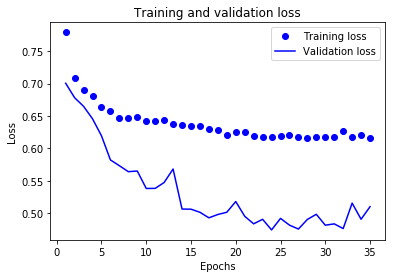

In [44]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

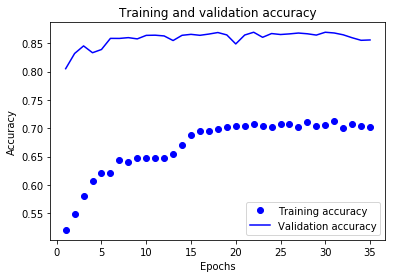

In [45]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

For the sake of a thorough experiment, we can also check the results when there is a smaller number of epochs.

Less epochs: 

In [46]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [47]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 15,
                    batch_size = 256,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 4s 287us/step - loss: 0.7659 - acc: 0.5847 - val_loss: 0.6998 - val_acc: 0.7412
Epoch 2/15
15000/15000 [==============================] - 4s 268us/step - loss: 0.6994 - acc: 0.6413 - val_loss: 0.6747 - val_acc: 0.7821
Epoch 3/15
15000/15000 [==============================] - 3s 210us/step - loss: 0.6835 - acc: 0.6717 - val_loss: 0.6656 - val_acc: 0.8467
Epoch 4/15
15000/15000 [==============================] - 3s 209us/step - loss: 0.6729 - acc: 0.6864 - val_loss: 0.6556 - val_acc: 0.8465
Epoch 5/15
15000/15000 [==============================] - 3s 225us/step - loss: 0.6645 - acc: 0.6958 - val_loss: 0.6183 - val_acc: 0.8497
Epoch 6/15
15000/15000 [==============================] - 3s 212us/step - loss: 0.6530 - acc: 0.7093 - val_loss: 0.6095 - val_acc: 0.8562
Epoch 7/15
15000/15000 [==============================] - 3s 214us/step - loss: 0.6509 - acc: 0.7122 - val_loss: 0.6032 - 

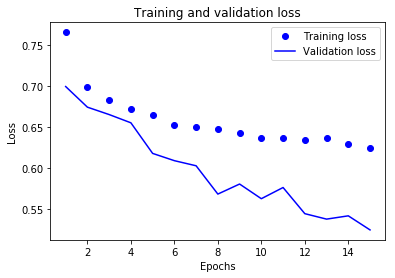

In [48]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

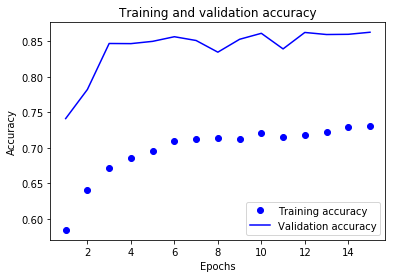

In [49]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

Verdict: as the results seem a little too optimistic with the over-fitting appearing only slightly in the loss results after almost 30 epochs I begin to worry our model might suffer from an information leak. Due to that, I will, precautiously, choose to stick with the smaller number of 15 epochs. 

##### 2.2.4 : Information leaks   

So far we have seen a rather spectacular effect of applying the regularisers and a dropout; the accuracy and the loss on the plots seem to be greater on the validation data instead of the training data. 
That would mean our model  predicts the reviews' sentiments even better on a never-seen data than on the reviews it has been actually trained. Our model has achieved a tremendous generalisation! But are we sure of it? Not necessarily. One must notice thus far our model has been trained and validated a multiple amount of times already. Although we never trained our model on the validation data (i.e. we never showed the model labels of the validation reviews, only checked if the model's prediction sentiment is correct), the model has been indirectly developing a sense of what answer to provide for a given validation review instead of actually predicting basing on the knowledge gained from the training set. This could be compared to a student who instead of the actual studying does enough of mock exams to develop a sense of examiner's way of creating the exams and, therefore, learning only those questions they know will appear on the exam.                 

One of the natural ways to discover when we happen to have the information leakage is when we seem to have overly optimistic results.

*“too good to be true” performance is “a dead giveaway” of its existence* (“Doing Data Science: Straight Talk from the Frontline” , chapter 13)

With that being said, let us run a test set and see the real-life results 

In [50]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 11s 457us/step


In [51]:
results

[0.5304695237636566, 0.86032]

For a comparison, here is an evaluation of the base model found in part 2.1. This time it has a smaller number of epochs to account for the over-fitting happening after running more than 4 epochs:  

In [52]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16 ,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 5s 192us/step - loss: 0.4901 - acc: 0.8240
Epoch 2/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.2801 - acc: 0.9064
Epoch 3/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2070 - acc: 0.9270
Epoch 4/4
25000/25000 [==============================] - 4s 166us/step


[0.2908405643081665, 0.88516]

## Section 3: Evaluation, conclusion & extra remarks

### 3.1: Enhanced model vs. the original

Our enhanced model, contrary to the predictions, has not suffered from the information leak: the range between 80-90% of the accuracy and 45-55% of the loss on the validation set has proved to be found also on the test set. Should the results be different, we would need to use a k-fold validation approach and might be required to reduce the number of trained models.

However, despite adding regularisers and a dropout as well as changing a number of hyper-parameters, our new model behaves worse than the simpler, original one. A possible explanation of this situation is that we prematurely added regularisers instead of firstly reducing the network's size (as suggested in the DLWP book). This led us to choose a combination of L1 & L2 regularisers instead of just L2 for a promise of more stable, not over-fitting (but ultimately underperforming) results. 

### 3.2: Conclusion: eventuality of a better scalability with the enhanced model  

One important distinction between the models is that the original model achieves its results by finding a "sweet spot" between simply memorizing the training labels and be generalised enough. On the other hand, the enhanced model, due to restricting network's size,  using the regularisers and adding a dropout was forced to learn only the most important patterns and eventually generalise very well: the validation results are mostly better then the ones on the training data. 

The observation above raises a highly interesting possibility: **_given a much bigger and/or a completely different test set it is imaginable that the enhanced model would produce a better result than the original one, because the latter likely was just "lucky enough" to be given a set of data it could output the right result by memorising some information from the training data._**     

This situation, once again, can be compared to a school environment: imagine there are 2 students studying towards a math exam (our test set), the first one tries a mixture of partly understanding the mathematical principles *and* simply memorizing the solution to maths problems that are **likely** to appear on the exam (base model). The second one solely focuses on learning all the the mathematical principles (enhanced model). The first one is fortunate enough to achieve a better score than the latter, hovewer, it is the second one that has a more **general** knowledge and who will be able to achieve more outside the school environment - in the AI scenario: where the test set is so big or different to training data that partial memorizing would perform poorly.             

With the above stated, I believe the question whether to use the basic or the enhanced model depends on the use case. When it is likely the real-world samples (i.e. what our test set mimics) will have highly similar nature or scale, using the basic model would be more efficient. Otherwise, using the enhanced model promises a more **stable** accuracy of 80-90% over the time and scale, where the former is plausibly to fall short on the results.     

###  3.3: Extra remarks: the best configuration

A series of trial and error experiments I have run outside of this notebook made me find a more efficient model using the L2 regulariser that gives a slightly more similar efficiency to the barebones model while also having the generalisation characteritics found in the enhanced model:  

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 4s 285us/step - loss: 0.6417 - acc: 0.6779 - val_loss: 0.5617 - val_acc: 0.7606
Epoch 2/6
15000/15000 [==============================] - 3s 217us/step - loss: 0.5490 - acc: 0.7965 - val_loss: 0.4925 - val_acc: 0.8662
Epoch 3/6
15000/15000 [==============================] - 3s 216us/step - loss: 0.4907 - acc: 0.8321 - val_loss: 0.4395 - val_acc: 0.8688
Epoch 4/6
15000/15000 [==============================] - 4s 246us/step - loss: 0.4531 - acc: 0.8406 - val_loss: 0.4084 - val_acc: 0.8665
Epoch 5/6
15000/15000 [==============================] - 3s 210us/step - loss: 0.4168 - acc: 0.8526 - val_loss: 0.3959 - val_acc: 0.8631
Epoch 6/6
15000/15000 [==============================] - 3s 209us/step - loss: 0.3814 - acc: 0.8662 - val_loss: 0.3915 - val_acc: 0.8654


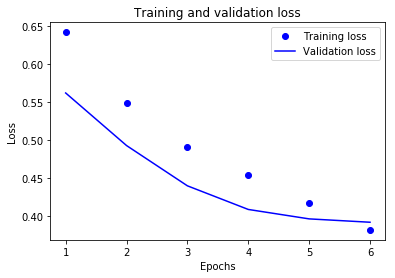

In [53]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu',  kernel_regularizer=regularizers.l2(0.0005), input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.0005), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 6,
                    batch_size = 128,
                    validation_data = (x_val, y_val))
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plotFunc(True, epochs, loss, val_loss)

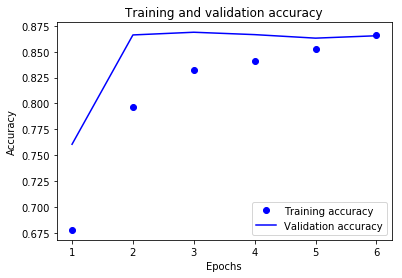

In [54]:
# Written in a separate cell as the plt.clf() would clear the loss plot if run in the same cell.  
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plotFunc(False, epochs, acc, val_acc)

In [55]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 4s 159us/step


[0.39525060079574587, 0.86452]

# Bibliography

[1] Manning Publications, 2017, Chollet F., "Deep Learning with Python"


[2] https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

[3] https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/